In [1]:
from sklearn.datasets import make_classification
import numpy as np 

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41, 
                         hypercube=False, class_sep=30)

In [3]:
import matplotlib.pyplot as plt

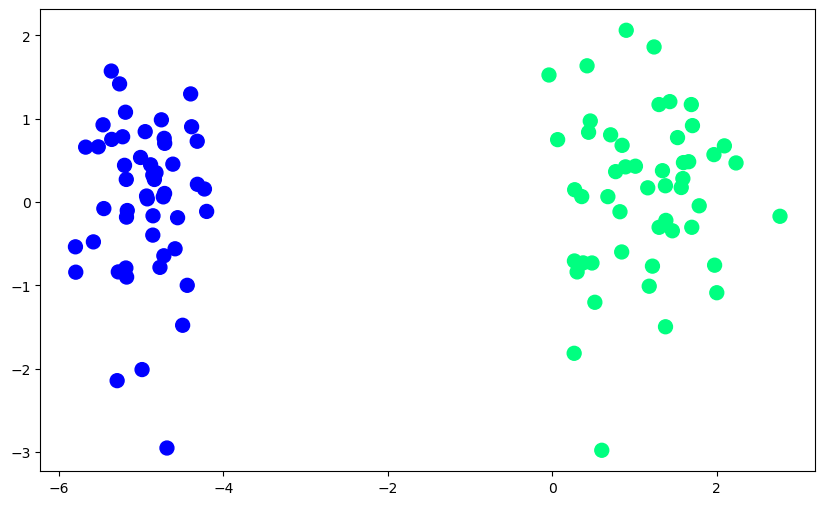

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [5]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000): 
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]

    return weights[0], weights[1:]

In [6]:
def step(z): 
    return 1 if z>0 else 0

In [7]:
intercept_, coef_ = perceptron(X, y)

In [8]:
print(intercept_)
print(coef_)

1.3000000000000003
[1.1134548  0.33857969]


In [9]:
m = -(coef_[0]/ coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

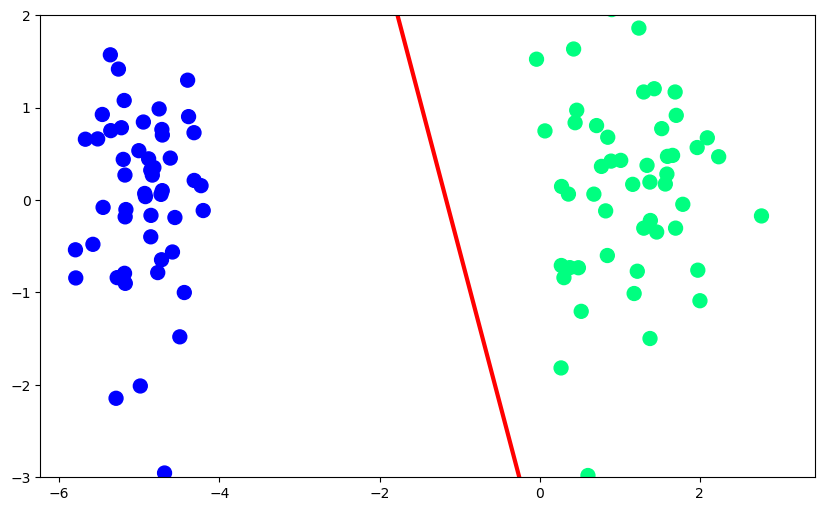

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [12]:
from sklearn.linear_model import LogisticRegression

In [17]:
lor = LogisticRegression(penalty='none', solver='sag')
lor.fit(X,y)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [18]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [19]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1+b

(-3.0, 2.0)

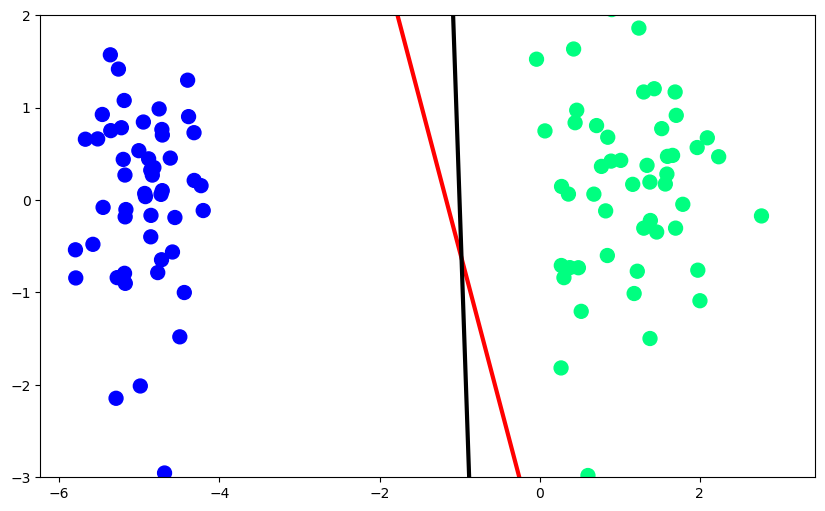

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [21]:
def perceptronSig(X,y): 
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000): 
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]

    return weights[0], weights[1:]

In [22]:
def sigmoid(z): 
    return 1/(1+np.exp(-z)) 

In [23]:
intercept_, coef_ = perceptronSig(X,y)

In [24]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [25]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

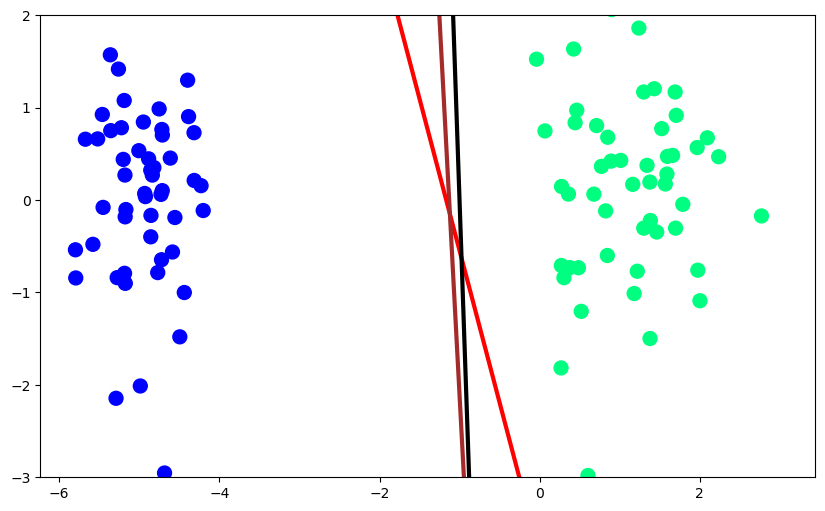

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3)
plt.plot(x_input2, y_input2, color = 'brown', linewidth = 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [32]:
def gd(X,y): 
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000): 
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr*(np.dot((y-y_hat), X)/X.shape[0])

    return weights[1:], weights[0]

In [33]:
coef_, intercept_ = gd(X, y)

In [34]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [35]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input3 + b

(-3.0, 2.0)

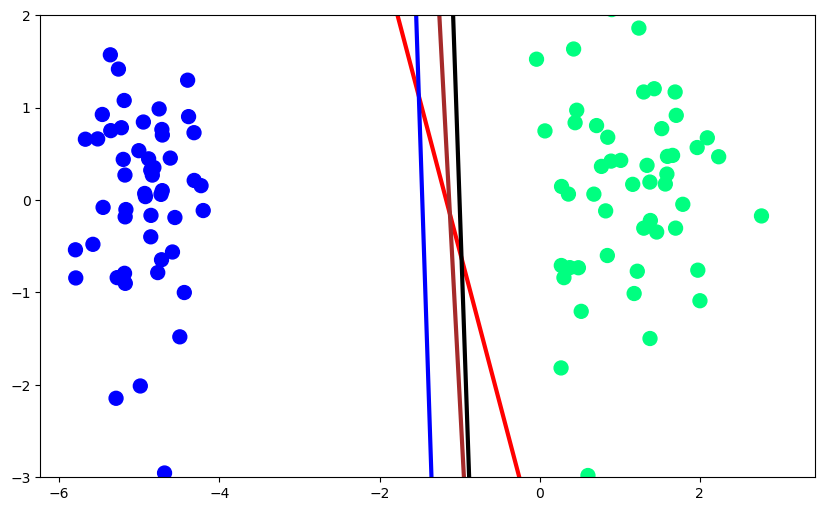

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3)
plt.plot(x_input2, y_input2, color = 'brown', linewidth = 3)
plt.plot(x_input3, y_input3, color = 'blue', linewidth = 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)